# Importing python packages

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing and analysing the data sets
## Births registration
First we need to import the dataset. As the dataset is in CSV format the easiest way is to use 'read_csv' pandas function for this file format. 

Birth registration data (2022) Birth registration data - UNICEF DATA data.unicef.org. UNICEF. Available at: https://data.unicef.org/resources/dataset/percentage-children-age-5-whose-births-registered-sex-place-residence-household-wealth-quintile/ (Accessed: December 30, 2022).

NOTE: File name for originally generated CSV file had to be renamed as Git was throwing the ‘Filename too long’ error when tried to add it to repository.

In [2]:
CB_percent = pd.read_csv('Percent of children_UNICEF_1.0_all.csv',low_memory=False)

### Exploring the data set

In [3]:
CB_percent.shape

(1648747, 22)

In [4]:
CB_percent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648747 entries, 0 to 1648746
Data columns (total 22 columns):
 #   Column                                                                          Non-Null Count    Dtype  
---  ------                                                                          --------------    -----  
 0   DATAFLOW                                                                        1648747 non-null  object 
 1   REF_AREA:Geographic area                                                        1648747 non-null  object 
 2   INDICATOR:Indicator                                                             1648747 non-null  object 
 3   SEX:Sex                                                                         1648747 non-null  object 
 4   TIME_PERIOD:Time period                                                         1648747 non-null  object 
 5   OBS_VALUE:Observation Value                                                     1648747 non-null  object 

We can see that there are a lot of null data values, however no columns are totally empty, hence need to analyse to detemine what columns are of interest and which can be discarded.

#### Analysis what columns are of interest and which can be discarded from the original data set

In [5]:
CB_percent.groupby('DATAFLOW').nunique()

,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,LOWER_BOUND:Lower Bound,...,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,DATA_SOURCE:Data Source,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
DATAFLOW,,,,,,,,,,,,,,,,,,,,,
UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indicators,330,380,3,163,844052,2,25,8,2,289582,...,16445,1037,21,5007,51,7,3,2,377,29


In [6]:
CB_percent.groupby('REF_AREA:Geographic area').nunique()

,DATAFLOW,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,LOWER_BOUND:Lower Bound,...,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,DATA_SOURCE:Data Source,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
REF_AREA:Geographic area,,,,,,,,,,,,,,,,,,,,,
ABW: Aruba,1,42,3,73,2636,2,8,2,1,0,...,0,4,6,9,6,0,1,0,3,3
AFG: Afghanistan,1,293,3,73,5419,2,25,7,2,2040,...,62,29,15,73,19,5,3,2,27,24
AGO: Angola,1,304,3,73,5223,2,25,6,1,1997,...,60,22,17,63,17,7,3,2,21,21
AIA: Anguilla,1,57,3,73,2441,2,7,3,2,0,...,0,5,5,15,8,0,1,0,5,5
ALB: Albania,1,301,3,73,4907,2,23,7,2,1623,...,145,23,16,72,18,6,3,2,32,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XKX: Kosovo,1,47,3,73,2471,2,6,2,1,0,...,0,1,6,8,1,0,1,0,3,9
YEM: Yemen,1,314,3,73,5577,2,25,7,1,2210,...,114,24,16,67,19,5,3,2,16,23
ZAF: South Africa,1,314,3,73,5602,2,25,7,2,2323,...,97,30,17,73,19,7,3,2,34,22


In [7]:
CB_percent.groupby('INDICATOR:Indicator').nunique()

,DATAFLOW,REF_AREA:Geographic area,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,LOWER_BOUND:Lower Bound,...,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,DATA_SOURCE:Data Source,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
INDICATOR:Indicator,,,,,,,,,,,,,,,,,,,,,
CME_ARR_10T19: Annual Rate of Reduction in Mortality Rate Age 10-19,1,231,1,1,62,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,1
CME_ARR_SBR: Annual rate of reduction in stillbirth rate (over previous 20 years),1,208,1,1,206,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,1
CME_ARR_U5MR: Annual rate of reduction in under-five mortality rate (over previous 20 years),1,231,1,1,77,0,1,1,0,85,...,0,0,0,1,0,0,0,1,0,1
CME_MRM0: Neonatal mortality rate,1,239,1,70,10671,0,1,1,0,10671,...,0,5,0,1,0,0,0,0,0,1
CME_MRY0: Infant mortality rate,1,239,3,87,38989,0,1,1,0,38994,...,0,5,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WS_SCH_W-B: Proportion of schools with basic drinking water services,1,182,1,22,761,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
WS_SCH_W-L: Proportion of schools with limited drinking water services,1,170,1,22,746,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
WS_SCH_W-N: Proportion of schools with no drinking water service,1,202,1,22,1553,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [8]:
CB_percent.groupby('SEX:Sex').nunique()

,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,LOWER_BOUND:Lower Bound,...,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,DATA_SOURCE:Data Source,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
SEX:Sex,,,,,,,,,,,,,,,,,,,,,
F: Female,1,298,215,125,234566,2,17,8,1,73361,...,5549,497,8,3474,18,3,3,0,339,23
M: Male,1,298,202,125,235140,2,14,7,1,74783,...,5599,320,8,1858,14,3,3,0,319,22
_T: Total,1,330,357,162,479137,2,21,8,2,168580,...,7060,780,21,3646,47,7,3,2,364,27


In [9]:
CB_percent.groupby('TIME_PERIOD:Time period').nunique()

,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,LOWER_BOUND:Lower Bound,...,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,DATA_SOURCE:Data Source,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
TIME_PERIOD:Time period,,,,,,,,,,,,,,,,,,,,,
1932,1,1,1,1,1,0,1,1,0,1,...,0,0,0,1,0,0,0,0,0,1
1933,1,1,1,1,1,0,1,1,0,1,...,0,0,0,1,0,0,0,0,0,1
1934,1,2,3,1,4,0,2,1,0,4,...,0,0,0,1,0,0,0,0,0,1
1935,1,2,3,1,4,0,2,1,0,4,...,0,0,0,1,0,0,0,0,0,1
1936,1,2,3,1,4,0,2,1,0,4,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,1,321,299,3,26524,2,16,7,2,9660,...,307,376,12,203,21,3,3,1,41,24
2020-04-16,1,1,57,3,97,1,2,1,1,86,...,15,0,1,1,1,1,1,0,1,1
2020-12-11,1,1,57,3,79,1,2,1,1,69,...,6,2,1,1,1,1,1,0,1,1


In [10]:
CB_percent.groupby('UNIT_MULTIPLIER:Unit multiplier').nunique()

,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,LOWER_BOUND:Lower Bound,...,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,DATA_SOURCE:Data Source,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
UNIT_MULTIPLIER:Unit multiplier,,,,,,,,,,,,,,,,,,,,,
0: Units,1,329,180,3,145,197935,11,7,1,9716,...,16445,627,14,4454,24,7,3,0,350,19
3: Thousands,1,302,10,3,73,260504,2,2,1,5677,...,0,21,4,7,4,2,1,0,2,3


In [11]:
CB_percent.groupby('OBS_STATUS:Observation Status').nunique()

,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_CONF:Observation confidentaility,LOWER_BOUND:Lower Bound,...,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,DATA_SOURCE:Data Source,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
OBS_STATUS:Observation Status,,,,,,,,,,,,,,,,,,,,,
A: Normal value,1,243,39,3,90,279319,0,11,0,275559,...,0,12,0,7,0,0,0,2,0,3
AD: Adjusted,1,161,18,3,39,513,1,1,1,0,...,226,30,6,335,5,4,2,0,118,8
E: Estimated value,1,288,78,3,43,16730,2,5,2,8256,...,0,422,5,43,8,2,2,0,28,20
ER: External Reanalysis,1,99,46,3,34,812,1,2,1,145,...,878,18,4,312,4,2,1,0,128,8
MD: Modelled,1,253,9,2,22,4525,2,4,1,5594,...,0,5,2,8,3,2,1,0,3,3
RA: Reanalysed,1,253,129,3,97,2945,1,4,2,2210,...,15387,249,5,1644,31,3,3,0,276,21
RP: Reported,1,234,105,3,43,2592,1,3,1,411,...,369,304,6,2829,15,3,3,0,296,22
U: Low reliability,1,32,10,3,18,183,1,1,1,175,...,141,4,3,61,3,2,2,0,36,7


In [12]:
CB_percent.groupby('OBS_CONF:Observation confidentaility').nunique()

,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,LOWER_BOUND:Lower Bound,...,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,DATA_SOURCE:Data Source,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
OBS_CONF:Observation confidentaility,,,,,,,,,,,,,,,,,,,,,
F: Free,1,325,194,3,120,23070,2,8,7,14495,...,16445,1007,9,4812,20,7,3,0,374,25
"N: Not for publication, restricted for internal use only",1,135,2,1,13,158,0,1,2,0,...,0,11,0,138,26,0,1,0,19,2


In [13]:
CB_percent.groupby('LOWER_BOUND:Lower Bound').nunique()

,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,...,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,DATA_SOURCE:Data Source,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
LOWER_BOUND:Lower Bound,,,,,,,,,,,,,,,,,,,,,
-0.0,1,58,4,3,33,6,1,1,1,1,...,190,13,1,109,1,1,1,0,52,1
-0.1,1,63,5,3,41,6,1,2,2,1,...,311,11,1,146,1,1,1,1,53,2
-0.2,1,74,5,3,46,10,1,2,2,1,...,372,12,1,174,1,1,1,1,63,2
-0.3,1,78,5,3,49,5,2,1,2,1,...,385,15,2,199,2,2,2,0,67,2
-0.4,1,80,5,3,44,7,1,2,4,1,...,358,11,1,180,1,1,1,1,62,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
<1,1,88,4,1,21,9,1,1,1,1,...,0,0,1,1,1,0,0,0,2,2
<100,1,124,7,3,21,11,1,1,1,1,...,0,0,1,1,1,0,0,0,1,1
<200,1,120,7,3,21,52,1,1,1,1,...,0,0,1,1,1,0,0,0,1,1


In [14]:
CB_percent.groupby('UPPER_BOUND:Upper Bound').nunique()

,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,...,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,DATA_SOURCE:Data Source,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
UPPER_BOUND:Upper Bound,,,,,,,,,,,,,,,,,,,,,
-0.0,1,52,4,3,34,3,1,1,1,1,...,163,8,1,97,1,1,1,0,46,1
-0.1,1,69,4,3,48,4,1,1,2,1,...,354,13,1,172,1,1,1,0,56,1
-0.2,1,67,4,3,47,4,1,1,3,1,...,352,14,1,180,1,1,1,0,54,1
-0.3,1,71,4,3,44,3,1,1,3,1,...,320,9,1,160,1,1,1,0,57,1
-0.4,1,69,4,3,45,5,1,1,3,1,...,358,11,1,168,1,1,1,0,58,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
<1,1,86,4,1,18,1,1,1,1,1,...,0,0,1,1,1,0,0,0,2,2
<100,1,107,7,3,21,1,1,1,1,1,...,0,0,1,1,1,0,0,0,1,1
<200,1,114,7,3,21,2,1,1,1,1,...,0,0,1,1,1,0,0,0,1,1


In [15]:
CB_percent.groupby('WGTD_SAMPL_SIZE:Weighted Sample Size').nunique()

,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,...,UPPER_BOUND:Upper Bound,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,DATA_SOURCE:Data Source,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
WGTD_SAMPL_SIZE:Weighted Sample Size,,,,,,,,,,,,,,,,,,,,,
0.000000e+00,1,1,2,1,1,2,1,1,1,1,...,2,0,1,1,1,1,1,0,1,1
2.000000e-01,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,0,1,1
3.000000e-01,1,1,3,2,1,4,1,1,1,1,...,4,0,1,1,1,1,1,0,2,3
4.000000e-01,1,1,3,2,1,3,1,1,1,1,...,3,0,1,1,1,1,1,0,2,2
5.000000e-01,1,1,3,2,1,3,1,1,1,1,...,3,0,1,1,1,1,1,0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.360556e+12,1,1,9,1,1,8,1,1,1,1,...,4,1,1,1,1,1,1,0,1,1
2.361127e+12,1,1,11,1,1,9,1,2,1,1,...,10,1,1,1,1,1,1,0,2,1
2.364772e+12,1,1,11,1,1,10,1,2,1,1,...,10,1,1,1,1,1,1,0,1,1


In [16]:
CB_percent.groupby('OBS_FOOTNOTE:Observation footnote').nunique()

,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,...,UPPER_BOUND:Upper Bound,WGTD_SAMPL_SIZE:Weighted Sample Size,SERIES_FOOTNOTE:Series footnote,DATA_SOURCE:Data Source,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
OBS_FOOTNOTE:Observation footnote,,,,,,,,,,,,,,,,,,,,,
-Break in series-Break in series: Methodology revised-Repository: ILO-STATISTICS - Micro data processing | Age coverage - maximum age: 75 years old,1,1,1,3,1,3,0,1,1,1,...,0,0,0,1,0,0,1,0,1,1
-Break in series-Break in series: Methodology revised-Repository: ILO-STATISTICS - Micro data processing | Age coverage - minimum age: 10 years old | Age coverage - maximum age: 75 years old,1,2,1,3,1,6,0,1,1,1,...,0,0,0,2,0,0,1,0,1,1
-Break in series-Break in series: Methodology revised-Repository: ILO-STATISTICS - Micro data processing | Age coverage - minimum age: 16 years old,1,2,1,3,3,9,0,1,1,1,...,0,0,0,2,0,0,1,0,3,1
-Break in series-Break in series: Methodology revised-Repository: ILO-STATISTICS - Micro data processing | Age coverage - minimum age: 16 years old | Age coverage - maximum age: 64 years old,1,1,1,3,1,3,0,1,1,1,...,0,0,0,1,0,0,1,0,1,1
-Break in series-Break in series: Methodology revised-Repository: ILO-STATISTICS - Micro data processing | Age coverage - minimum age: Less than or equal to 9 years old,1,1,1,3,1,3,0,1,1,1,...,0,0,0,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
regional average is based only on United States data hence confidence intervals are not provided,1,2,1,1,20,3,1,1,1,1,...,0,0,1,1,1,1,1,0,1,1
regional average is based only on United States data hence confidence intervals are not provided The estimates for the year 2020 do not account for the impact of COVID-19. Household survey data on child height and age were not collected in 2020 due to physical distancing policies.,1,2,3,1,1,3,1,1,1,1,...,0,0,1,1,1,1,1,0,2,1
y,1,1,1,3,1,3,0,1,1,1,...,0,0,0,1,0,0,1,0,1,1


In [17]:
CB_percent.groupby('SERIES_FOOTNOTE:Series footnote').nunique()

,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,...,UPPER_BOUND:Upper Bound,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,DATA_SOURCE:Data Source,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
SERIES_FOOTNOTE:Series footnote,,,,,,,,,,,,,,,,,,,,,
"233 countries from WUP2018, used WPP2019 total population data when calculating UNICEF aggregation",1,243,1,1,73,15475,1,1,0,0,...,0,0,0,1,1,0,0,0,0,1
Consumption,1,103,2,1,18,175,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
"Data from 236 countries/areas with population more than 1K from WPP2022, countries/areas less than 1K population is not shown but calculated when aggregated.",1,251,9,3,73,355531,2,2,0,0,...,0,0,0,1,1,0,0,0,0,1
Data from 237 countries/areas from WPP2022,1,252,4,3,73,91689,2,3,0,0,...,0,0,0,1,1,0,0,0,0,1
Data from Global AIDS Monitoring and UNAIDS estimates are published by UNAIDS in collaboration with UNICEF and WHO. More data can be found at http://aidsinfo.unaids.org/.,1,160,23,3,21,7485,1,5,2,1,...,7371,0,0,3,1,0,0,0,2,2
Earnings,1,3,2,1,3,4,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
Expressed in Current US Dollars,1,226,1,1,9,226,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
"Global UNICEF Global Databases: Infant and Young Child Feeding: Exclusive breastfeeding, Predominant breastfeeding, New York, May 2019",1,124,1,3,30,1021,1,1,5,1,...,893,918,1,423,1,1,1,0,0,1
Income (gross),1,6,2,1,6,9,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [18]:
CB_percent.groupby('DATA_SOURCE:Data Source').nunique()

,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,...,UPPER_BOUND:Upper Bound,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
DATA_SOURCE:Data Source,,,,,,,,,,,,,,,,,,,,,
Brazil National Survey on Health and Nutrition 1989. Ann Arbor United States Inter-University Consortium for Political and Social Research (ICPSR).,1,1,57,3,1,94,1,2,1,1,...,95,15,0,1,1,1,1,0,1,1
Cambodia Demographic and Health Survey 2014. Phnom Penh Cambodia and Rockville Maryland USA National Institute of Statistics Directorate General for Health and ICF International.,1,1,24,3,1,68,1,1,1,1,...,65,23,1,2,2,1,1,0,4,7
Dirección General de Estadística Encuestas y Censos Ministerio de Salud Pública y Bienestar Social UNICEF Paraguay. Encuesta de Indicadores Multiples por Conglomerados MICS Paraguay 2016.,1,1,1,1,1,1,1,1,1,1,...,0,0,0,1,1,1,1,0,0,1
Dominican Republic National Multipurpose Household Survey 2009-2010 (ENHOGAR). 2011.,1,1,3,3,1,5,1,1,1,1,...,0,3,0,1,1,1,1,0,1,3
EnquÃÂÃÂªte DÃÂÃÂ©mographique et de SantÃÂÃÂ© au BÃÂÃÂ©nin 2017-2018. Cotonou BÃÂÃÂ©nin et Rockville Maryland USA INSAE et ICF,1,1,2,1,1,2,1,1,1,1,...,2,2,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
n Institute for Public Health 2018,1,1,2,2,1,2,1,1,1,1,...,0,0,0,0,0,0,1,0,2,2
n National HIV Prevalence; Incidence; Behaviour and Communication Survey; : The health of our children 2008: 2008,1,1,3,2,1,3,1,1,1,1,...,0,0,0,0,0,0,1,0,1,2
ÃÂÃ¢ÂÂ°tude epidemiologique de la lutte contre les troubles dus a la carence en iode au benin,1,1,2,1,1,1,1,1,1,1,...,0,0,1,1,1,1,1,0,1,1


In [19]:
CB_percent.groupby('SOURCE_LINK:Citation of or link to the data source').nunique()

,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,...,UPPER_BOUND:Upper Bound,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,DATA_SOURCE:Data Source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
SOURCE_LINK:Citation of or link to the data source,,,,,,,,,,,,,,,,,,,,,
CRAVE 2020 Addition,1,1,1,3,1,3,1,1,1,1,...,0,0,0,0,1,0,1,0,1,1
Data downloaded from SDG Database October 2022,1,216,1,1,21,172,1,1,1,1,...,0,0,2,0,298,0,1,0,0,1
"Data downloaded from United Nations, Department of Economic and Social Affairs, Population Division (2022). World Population Prospects 2022, Online Edition.",1,232,1,1,1,154,1,1,1,1,...,0,0,0,0,1,0,0,0,1,1
"Data downloaded from WHO MNCAH Data Portal Sept 2022, http://who.int/data/maternal-newborn-child-adolescent",1,126,1,3,14,211,1,1,1,1,...,0,0,2,0,23,0,1,0,14,1
"Data downloaded from WHO MNCAH Data Portal, http://who.int/data/maternal-newborn-child-adolescent",1,133,1,3,16,6370,1,1,1,1,...,0,0,1,0,1,0,1,0,1,1
"Data downloaded from WHO MNCAH Data Portal, https://www.who.int/data/mncah",1,189,1,3,1,371,1,1,1,1,...,0,0,0,0,1,0,1,0,1,1
Ever-married women age 20-24,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,1,0,1,0,1,1
Joint UNICEF-WHO Database on Skilled Birth Attendance 2022 (SDG inclusion=1),1,190,1,1,22,441,1,1,1,1,...,0,0,164,0,1183,0,1,0,53,1
Mali 2015 MICS Final Report - Errata November 2017,1,1,8,3,1,10,1,1,1,1,...,0,0,1,0,1,0,1,0,3,4


In [20]:
CB_percent.groupby('CUSTODIAN:Custodian').nunique()

,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,...,UPPER_BOUND:Upper Bound,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,DATA_SOURCE:Data Source,SOURCE_LINK:Citation of or link to the data source,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
CUSTODIAN:Custodian,,,,,,,,,,,,,,,,,,,,,
NCD Risk Factor Collaboration,1,190,2,3,42,620,1,1,0,1,...,716,0,0,1,2,1,1,0,1,1
Nutrition Section Programme Dvision and the Data and Analytics Section Division of Data Analytics Planning and Monitoring UNICEF,1,64,3,1,21,100,1,1,1,1,...,0,0,1,1,3,0,1,0,19,1
UNICEF,1,178,1,1,15,125,1,1,3,1,...,0,0,0,1,178,1,1,0,0,1
UNICEF Division of Data Analysis Planning and Monitoring,1,229,85,3,109,5950,2,2,7,1,...,6848,15580,417,3,1513,3,2,0,284,8
UNICEF Division of Data Analysis Planning and Monitoring WHO,1,214,2,1,16,1805,2,2,1,1,...,1001,0,7,1,3,1,1,0,1,1
"UNICEF Division of Data, Analysis, Planning and Monitoring",1,124,1,3,30,1021,1,1,5,1,...,893,918,1,1,423,1,1,0,0,1
UNICEF WHO,1,147,1,1,16,232,1,1,1,1,...,2352,0,2,1,1,1,0,0,1,1


In [21]:
CB_percent.groupby('TIME_PERIOD_METHOD:Time period activity related to when the data are collected').nunique()

,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,...,UPPER_BOUND:Upper Bound,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,DATA_SOURCE:Data Source,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
TIME_PERIOD_METHOD:Time period activity related to when the data are collected,,,,,,,,,,,,,,,,,,,,,
EOF: End of fieldwork,1,288,58,3,25,9269,1,3,4,2,...,0,0,591,0,2865,38,0,0,226,18
MOF: Middle of fieldwork,1,162,82,3,109,1988,1,2,5,1,...,2542,16445,145,4,1910,4,2,0,284,8
OTHER: Other,1,262,29,3,46,6814,2,2,5,1,...,6344,0,278,7,193,5,5,0,22,8


In [22]:
CB_percent.groupby('REF_PERIOD:Reference Period').nunique()

,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,...,UPPER_BOUND:Upper Bound,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,DATA_SOURCE:Data Source,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
REF_PERIOD:Reference Period,,,,,,,,,,,,,,,,,,,,,
2000-2019,1,195,1,1,1,195,0,1,1,0,...,0,0,0,0,1,0,0,0,0,1
2000-2020,1,231,2,1,2,89,0,1,1,0,...,80,0,0,0,1,0,0,0,0,1


In [23]:
CB_percent.groupby('COVERAGE_TIME:The period of time for which data are provided').nunique()

,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,...,UPPER_BOUND:Upper Bound,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,DATA_SOURCE:Data Source,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,AGE:Current age
COVERAGE_TIME:The period of time for which data are provided,,,,,,,,,,,,,,,,,,,,,
1975-2016,1,190,2,3,42,620,1,1,0,1,...,716,0,0,1,2,1,1,1,0,1
1983-2010,1,1,5,3,3,33,1,1,3,1,...,13,13,2,1,3,1,1,1,0,1
1985-1994,1,1,3,1,2,6,1,1,1,1,...,0,2,2,1,2,1,1,1,0,1
1985-1995,1,1,4,1,2,8,1,1,1,1,...,0,2,1,1,2,1,1,1,0,1
1985-2018,1,1,4,3,3,19,1,1,2,1,...,14,13,2,1,3,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-2030,1,253,2,3,1,988,1,1,0,0,...,0,0,0,2,2,2,0,0,0,1
2020-21,1,1,2,3,1,5,0,1,2,1,...,0,0,0,0,2,0,0,1,0,2
2021,1,253,26,3,1,308,1,4,4,2,...,0,0,14,0,40,3,0,1,0,12


In [24]:
CB_percent.groupby('AGE:Current age').nunique()

,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,...,UPPER_BOUND:Upper Bound,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,DATA_SOURCE:Data Source,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided
AGE:Current age,,,,,,,,,,,,,,,,,,,,,
M0T23: Under 24 months old,1,179,2,3,41,522,1,1,5,1,...,474,1111,47,1,523,1,1,2,0,128
M0T47: Under 48 months old,1,2,3,3,2,18,0,1,1,1,...,0,0,4,0,2,0,0,1,0,2
M0T5: Under 6 months old,1,189,3,3,41,1670,1,1,6,1,...,1599,2063,58,2,1012,2,2,2,0,129
M12T15: 12 to 15 months old,1,132,1,3,45,592,1,1,5,1,...,474,1200,7,1,624,1,1,1,0,95
M12T23: 12 to 23 months old,1,256,12,3,52,724,1,1,6,1,...,577,1228,55,1,517,1,1,2,0,92
M20T23: 20 to 23 months old,1,131,1,3,45,666,1,1,5,1,...,593,1153,5,1,611,1,1,1,0,96
M24T59: 24 to 59 months old,1,51,1,3,5,138,0,1,3,1,...,0,0,13,0,13,0,0,1,0,8
M36T59: 36 to 59 months old,1,113,2,3,17,428,0,1,3,1,...,0,0,30,0,49,0,0,1,0,26
M6T23: 6 to 23 months old,1,174,14,3,30,1047,1,1,5,1,...,974,1715,138,1,385,1,1,2,0,102


- `DATAFLOW` column has only one value, which has no added value for our project, hence can be dropped from the original data set.
- `REF_AREA:Geographic area` column contains 330 differenc geographical areas (ie. countries) which is one of the main coulumns we expected to find.
- `INDICATOR:Indicator` column lists different indicators that data represents. There are 380 unique values.  
- `SEX:Sex` column indicate if the figures collected reffer to *F: Female*, *M: Male* or *_T: Total*. Something I'm not focusing to look into at this moment, hence decision to look at only *_T: Total* values.
- `TIME_PERIOD:Time period` column indicates year the data is reported for, but it was noticed that some fields don't only contain just a year, but also a specific dates. This needs further analysis and filtering.
- `UNIT_MULTIPLIER:Unit multiplier`column indicates if data represents *0: Units* or *3: Thousands*.
- `OBS_STATUS:Observation Status` column has 8 unique values describing how the values were obtained. I have decided to discard all rows that are not having *A: Normal value* or *RP: Reported* values.
- `OBS_CONF:Observation confidentaility`column indicates if data is *F: Free* or *N: Not for publication, restricted for internal use only*.
- `LOWER_BOUND:Lower Bound` contains 289582 different values. 
- `UPPER_BOUND:Upper Bound` contains 297085 different values.
- `WGTD_SAMPL_SIZE:Weighted Sample Size` contains 16445 different values.
- `OBS_FOOTNOTE:Observation footnote` contains 1037 different notes about the data points.
- `SERIES_FOOTNOTE:Series footnote`  contains 21 different values and provides some additional note about the data points
- `DATA_SOURCE:Data Source` contains 5007 different references on where is data coming from and it looks it's mainly written in the local language.
- `SOURCE_LINK:Citation of or link to the data source` column name is self explanatory and contas 51 unique values
- `CUSTODIAN:Custodian` column contains information about 7 different data custodians.
- `TIME_PERIOD_METHOD:Time period activity related to when the data are collected` column has 3 unique values *EOF: End of fieldwork*,  *MOF: Middle of fieldwork* and *OTHER: Other* which doesn't seem too interesting hence will drop from the final data set. 
- `REF_PERIOD:Reference Period` column contains two unique values *2000-2019* and *2000-2020*
- `COVERAGE_TIME:The period of time for which data are provided` column contains 377 unique values for the time period data points are provided.
- `AGE:Current age` column indicates the age range of population counted and contains 29 unique values. 

Analyzing `INDICATOR:Indicator` column

In [25]:
CB_Ind = CB_percent.groupby('INDICATOR:Indicator').nunique()
CB_Ind

,DATAFLOW,REF_AREA:Geographic area,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,LOWER_BOUND:Lower Bound,...,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,DATA_SOURCE:Data Source,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
INDICATOR:Indicator,,,,,,,,,,,,,,,,,,,,,
CME_ARR_10T19: Annual Rate of Reduction in Mortality Rate Age 10-19,1,231,1,1,62,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,1
CME_ARR_SBR: Annual rate of reduction in stillbirth rate (over previous 20 years),1,208,1,1,206,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,1
CME_ARR_U5MR: Annual rate of reduction in under-five mortality rate (over previous 20 years),1,231,1,1,77,0,1,1,0,85,...,0,0,0,1,0,0,0,1,0,1
CME_MRM0: Neonatal mortality rate,1,239,1,70,10671,0,1,1,0,10671,...,0,5,0,1,0,0,0,0,0,1
CME_MRY0: Infant mortality rate,1,239,3,87,38989,0,1,1,0,38994,...,0,5,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WS_SCH_W-B: Proportion of schools with basic drinking water services,1,182,1,22,761,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
WS_SCH_W-L: Proportion of schools with limited drinking water services,1,170,1,22,746,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
WS_SCH_W-N: Proportion of schools with no drinking water service,1,202,1,22,1553,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [26]:
CB_Ind[CB_Ind.index.str.contains("birt")]

,DATAFLOW,REF_AREA:Geographic area,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,LOWER_BOUND:Lower Bound,...,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,DATA_SOURCE:Data Source,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
INDICATOR:Indicator,,,,,,,,,,,,,,,,,,,,,
CME_ARR_SBR: Annual rate of reduction in stillbirth rate (over previous 20 years),1,208,1,1,206,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,1
CME_SB: Stillbirths,1,239,1,20,3394,0,1,1,0,3237,...,0,0,0,1,0,0,0,0,0,1
CME_SBR: Stillbirth rate,1,239,1,20,4740,0,1,1,0,4700,...,0,3,0,1,0,0,0,0,0,1
DM_BRTS: Number of births,1,252,1,73,16210,1,1,0,0,0,...,0,0,1,1,1,0,0,0,0,1
HVA_PED_EID_CVG: Per cent of infants born to pregnant women living with HIV who received a virological test for HIV within 2 months of birth,1,95,1,10,503,1,1,1,1,480,...,0,0,1,1,1,0,0,0,1,1
HVA_PED_EID_NUM: Reported number of infants born to pregnant women living with HIV who received a virological test for HIV within 2 months of birth,1,95,1,10,287,1,1,1,1,0,...,0,0,1,1,1,0,0,0,1,1
IM_BCG: Percentage of live births who received bacille Calmette-Guerin (vaccine against tuberculosis),1,195,1,42,100,1,1,1,1,0,...,0,0,0,1,0,0,0,0,0,1
IM_HEPBB: Percentage of live births who received hepatitis-B-containing vaccine within 24 hours of birth,1,133,1,22,100,1,1,1,1,0,...,0,0,0,1,0,0,0,0,0,1
IM_PAB: Percentage of newborns protected at birth against tetanus with tetanus toxoid,1,122,1,42,100,1,1,1,1,0,...,0,0,0,1,0,0,0,0,0,1


In [27]:
CB_Ind[CB_Ind.index.str.contains("PT_CHLD_Y0T4_REG")]

,DATAFLOW,REF_AREA:Geographic area,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,LOWER_BOUND:Lower Bound,...,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,DATA_SOURCE:Data Source,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
INDICATOR:Indicator,,,,,,,,,,,,,,,,,,,,,
PT_CHLD_Y0T4_REG: Percentage of children under age 5 whose births are registered,1,189,3,15,237,0,1,3,1,0,...,0,51,0,79,0,0,1,0,26,1


*PT_CHLD_Y0T4_REG: Percentage of children under age 5 whose births are registered* is the value within `INDICATOR:Indicator` column we are interested in. 

In [28]:
PT_CHLD_Y0T4_REG = CB_percent[CB_percent['INDICATOR:Indicator']=="PT_CHLD_Y0T4_REG: Percentage of children under age 5 whose births are registered"]
PT_CHLD_Y0T4_REG

,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,...,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,DATA_SOURCE:Data Source,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
6499,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,PT_CHLD_Y0T4_REG: Percentage of children under...,F: Female,2015,41.9,NaN,PCNT: %,RP: Reported,F: Free,...,NaN,NaN,NaN,DHS 2015,NaN,NaN,EOF: End of fieldwork,NaN,2015,Y0T4: Under 5 years old
6500,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,PT_CHLD_Y0T4_REG: Percentage of children under...,M: Male,2015,42.7,NaN,PCNT: %,RP: Reported,F: Free,...,NaN,NaN,NaN,DHS 2015,NaN,NaN,EOF: End of fieldwork,NaN,2015,Y0T4: Under 5 years old
6501,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,PT_CHLD_Y0T4_REG: Percentage of children under...,_T: Total,2015,42.3,NaN,PCNT: %,RP: Reported,F: Free,...,NaN,NaN,NaN,DHS 2015,NaN,NaN,EOF: End of fieldwork,NaN,2015,Y0T4: Under 5 years old
14765,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,ALB: Albania,PT_CHLD_Y0T4_REG: Percentage of children under...,F: Female,2018,98,NaN,PCNT: %,RP: Reported,F: Free,...,NaN,NaN,NaN,DHS 2017-18,NaN,NaN,EOF: End of fieldwork,NaN,2017-18,Y0T4: Under 5 years old
14766,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,ALB: Albania,PT_CHLD_Y0T4_REG: Percentage of children under...,M: Male,2018,98.9,NaN,PCNT: %,RP: Reported,F: Free,...,NaN,NaN,NaN,DHS 2017-18,NaN,NaN,EOF: End of fieldwork,NaN,2017-18,Y0T4: Under 5 years old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635966,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,ZMB: Zambia,PT_CHLD_Y0T4_REG: Percentage of children under...,M: Male,2018,14.1,NaN,PCNT: %,RP: Reported,F: Free,...,NaN,NaN,NaN,DHS 2018,NaN,NaN,EOF: End of fieldwork,NaN,2018,Y0T4: Under 5 years old
1635967,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,ZMB: Zambia,PT_CHLD_Y0T4_REG: Percentage of children under...,_T: Total,2018,14,NaN,PCNT: %,RP: Reported,F: Free,...,NaN,NaN,NaN,DHS 2018,NaN,NaN,EOF: End of fieldwork,NaN,2018,Y0T4: Under 5 years old
1644676,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,ZWE: Zimbabwe,PT_CHLD_Y0T4_REG: Percentage of children under...,F: Female,2019,48.9,NaN,PCNT: %,RP: Reported,F: Free,...,NaN,NaN,NaN,MICS 2019,NaN,NaN,EOF: End of fieldwork,NaN,2019,Y0T4: Under 5 years old
1644677,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,ZWE: Zimbabwe,PT_CHLD_Y0T4_REG: Percentage of children under...,M: Male,2019,48.4,NaN,PCNT: %,RP: Reported,F: Free,...,NaN,NaN,NaN,MICS 2019,NaN,NaN,EOF: End of fieldwork,NaN,2019,Y0T4: Under 5 years old


Reducing the data set to select only *_T: Total* values for `SEX:Sex` column as well as discarding *E: Estimated value* and *RA: Reanalysed* values from `OBS_STATUS:Observation Status`

In [29]:
PT_CHLD_Y0T4_REG = PT_CHLD_Y0T4_REG[PT_CHLD_Y0T4_REG['SEX:Sex']=="_T: Total"]
PT_CHLD_Y0T4_REG

,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,...,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,DATA_SOURCE:Data Source,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
6501,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,PT_CHLD_Y0T4_REG: Percentage of children under...,_T: Total,2015,42.3,NaN,PCNT: %,RP: Reported,F: Free,...,NaN,NaN,NaN,DHS 2015,NaN,NaN,EOF: End of fieldwork,NaN,2015,Y0T4: Under 5 years old
14767,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,ALB: Albania,PT_CHLD_Y0T4_REG: Percentage of children under...,_T: Total,2018,98.4,NaN,PCNT: %,RP: Reported,F: Free,...,NaN,NaN,NaN,DHS 2017-18,NaN,NaN,EOF: End of fieldwork,NaN,2017-18,Y0T4: Under 5 years old
22717,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,DZA: Algeria,PT_CHLD_Y0T4_REG: Percentage of children under...,_T: Total,2019,99.6,NaN,PCNT: %,RP: Reported,F: Free,...,NaN,NaN,NaN,MICS 2018-19,NaN,NaN,EOF: End of fieldwork,NaN,2018-19,Y0T4: Under 5 years old
38911,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AGO: Angola,PT_CHLD_Y0T4_REG: Percentage of children under...,_T: Total,2016,25,NaN,PCNT: %,RP: Reported,F: Free,...,NaN,NaN,NaN,DHS 2015-16,NaN,NaN,EOF: End of fieldwork,NaN,2015-16,Y0T4: Under 5 years old
54353,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,ARG: Argentina,PT_CHLD_Y0T4_REG: Percentage of children under...,_T: Total,2020,99.7,NaN,PCNT: %,RP: Reported,F: Free,...,NaN,The sample was national and urban,NaN,MICS 2019-20,NaN,NaN,EOF: End of fieldwork,NaN,2019-20,Y0T4: Under 5 years old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603241,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,UNICEF_WE: Western Europe,PT_CHLD_Y0T4_REG: Percentage of children under...,_T: Total,2021,100,NaN,PCNT: %,E: Estimated value,F: Free,...,NaN,Based on 32 countries with a population covera...,NaN,"DHS, MICS, other national surveys, censuses an...",NaN,NaN,EOF: End of fieldwork,NaN,2012-21,Y0T4: Under 5 years old
1609664,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,WORLD: World,PT_CHLD_Y0T4_REG: Percentage of children under...,_T: Total,2021,75.6,NaN,PCNT: %,E: Estimated value,F: Free,...,NaN,Based on 166 countries with a population cover...,NaN,"DHS, MICS, other national surveys, censuses an...",NaN,NaN,EOF: End of fieldwork,NaN,2012-21,Y0T4: Under 5 years old
1627567,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,YEM: Yemen,PT_CHLD_Y0T4_REG: Percentage of children under...,_T: Total,2013,30.7,NaN,PCNT: %,RP: Reported,F: Free,...,NaN,NaN,NaN,DHS 2013,NaN,NaN,EOF: End of fieldwork,NaN,2013,Y0T4: Under 5 years old
1635967,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,ZMB: Zambia,PT_CHLD_Y0T4_REG: Percentage of children under...,_T: Total,2018,14,NaN,PCNT: %,RP: Reported,F: Free,...,NaN,NaN,NaN,DHS 2018,NaN,NaN,EOF: End of fieldwork,NaN,2018,Y0T4: Under 5 years old


In [30]:
PT_CHLD_Y0T4_REG = PT_CHLD_Y0T4_REG[PT_CHLD_Y0T4_REG['OBS_STATUS:Observation Status'] == 'RP: Reported']
PT_CHLD_Y0T4_REG

,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,...,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,DATA_SOURCE:Data Source,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
6501,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,PT_CHLD_Y0T4_REG: Percentage of children under...,_T: Total,2015,42.3,NaN,PCNT: %,RP: Reported,F: Free,...,NaN,NaN,NaN,DHS 2015,NaN,NaN,EOF: End of fieldwork,NaN,2015,Y0T4: Under 5 years old
14767,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,ALB: Albania,PT_CHLD_Y0T4_REG: Percentage of children under...,_T: Total,2018,98.4,NaN,PCNT: %,RP: Reported,F: Free,...,NaN,NaN,NaN,DHS 2017-18,NaN,NaN,EOF: End of fieldwork,NaN,2017-18,Y0T4: Under 5 years old
22717,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,DZA: Algeria,PT_CHLD_Y0T4_REG: Percentage of children under...,_T: Total,2019,99.6,NaN,PCNT: %,RP: Reported,F: Free,...,NaN,NaN,NaN,MICS 2018-19,NaN,NaN,EOF: End of fieldwork,NaN,2018-19,Y0T4: Under 5 years old
38911,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AGO: Angola,PT_CHLD_Y0T4_REG: Percentage of children under...,_T: Total,2016,25,NaN,PCNT: %,RP: Reported,F: Free,...,NaN,NaN,NaN,DHS 2015-16,NaN,NaN,EOF: End of fieldwork,NaN,2015-16,Y0T4: Under 5 years old
54353,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,ARG: Argentina,PT_CHLD_Y0T4_REG: Percentage of children under...,_T: Total,2020,99.7,NaN,PCNT: %,RP: Reported,F: Free,...,NaN,The sample was national and urban,NaN,MICS 2019-20,NaN,NaN,EOF: End of fieldwork,NaN,2019-20,Y0T4: Under 5 years old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562760,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,VUT: Vanuatu,PT_CHLD_Y0T4_REG: Percentage of children under...,_T: Total,2013,43.4,NaN,PCNT: %,RP: Reported,F: Free,...,NaN,Data refer only to children with a birth certi...,NaN,DHS 2013,NaN,NaN,EOF: End of fieldwork,NaN,2013,Y0T4: Under 5 years old
1577122,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,VNM: Viet Nam,PT_CHLD_Y0T4_REG: Percentage of children under...,_T: Total,2014,96.1,NaN,PCNT: %,RP: Reported,F: Free,...,NaN,NaN,NaN,MICS 2014,NaN,NaN,EOF: End of fieldwork,NaN,2014,Y0T4: Under 5 years old
1627567,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,YEM: Yemen,PT_CHLD_Y0T4_REG: Percentage of children under...,_T: Total,2013,30.7,NaN,PCNT: %,RP: Reported,F: Free,...,NaN,NaN,NaN,DHS 2013,NaN,NaN,EOF: End of fieldwork,NaN,2013,Y0T4: Under 5 years old
1635967,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,ZMB: Zambia,PT_CHLD_Y0T4_REG: Percentage of children under...,_T: Total,2018,14,NaN,PCNT: %,RP: Reported,F: Free,...,NaN,NaN,NaN,DHS 2018,NaN,NaN,EOF: End of fieldwork,NaN,2018,Y0T4: Under 5 years old


In [31]:
PT_CHLD_Y0T4_REG.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 6501 to 1644678
Data columns (total 22 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   DATAFLOW                                                                        120 non-null    object 
 1   REF_AREA:Geographic area                                                        120 non-null    object 
 2   INDICATOR:Indicator                                                             120 non-null    object 
 3   SEX:Sex                                                                         120 non-null    object 
 4   TIME_PERIOD:Time period                                                         120 non-null    object 
 5   OBS_VALUE:Observation Value                                                     120 non-null    object 
 6   UNIT_MULTIP

In [32]:
PT_CHLD_Y0T4_REG.isnull().sum()

DATAFLOW                                                                            0
REF_AREA:Geographic area                                                            0
INDICATOR:Indicator                                                                 0
SEX:Sex                                                                             0
TIME_PERIOD:Time period                                                             0
OBS_VALUE:Observation Value                                                         0
UNIT_MULTIPLIER:Unit multiplier                                                   120
UNIT_MEASURE:Unit of measure                                                        0
OBS_STATUS:Observation Status                                                       0
OBS_CONF:Observation confidentaility                                                0
LOWER_BOUND:Lower Bound                                                           120
UPPER_BOUND:Upper Bound                               

In [33]:
PT_CHLD_Y0T4_REG = PT_CHLD_Y0T4_REG.dropna(axis=1, how='all')
PT_CHLD_Y0T4_REG

,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,OBS_FOOTNOTE:Observation footnote,DATA_SOURCE:Data Source,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
6501,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,PT_CHLD_Y0T4_REG: Percentage of children under...,_T: Total,2015,42.3,PCNT: %,RP: Reported,F: Free,NaN,DHS 2015,EOF: End of fieldwork,2015,Y0T4: Under 5 years old
14767,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,ALB: Albania,PT_CHLD_Y0T4_REG: Percentage of children under...,_T: Total,2018,98.4,PCNT: %,RP: Reported,F: Free,NaN,DHS 2017-18,EOF: End of fieldwork,2017-18,Y0T4: Under 5 years old
22717,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,DZA: Algeria,PT_CHLD_Y0T4_REG: Percentage of children under...,_T: Total,2019,99.6,PCNT: %,RP: Reported,F: Free,NaN,MICS 2018-19,EOF: End of fieldwork,2018-19,Y0T4: Under 5 years old
38911,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AGO: Angola,PT_CHLD_Y0T4_REG: Percentage of children under...,_T: Total,2016,25,PCNT: %,RP: Reported,F: Free,NaN,DHS 2015-16,EOF: End of fieldwork,2015-16,Y0T4: Under 5 years old
54353,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,ARG: Argentina,PT_CHLD_Y0T4_REG: Percentage of children under...,_T: Total,2020,99.7,PCNT: %,RP: Reported,F: Free,The sample was national and urban,MICS 2019-20,EOF: End of fieldwork,2019-20,Y0T4: Under 5 years old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562760,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,VUT: Vanuatu,PT_CHLD_Y0T4_REG: Percentage of children under...,_T: Total,2013,43.4,PCNT: %,RP: Reported,F: Free,Data refer only to children with a birth certi...,DHS 2013,EOF: End of fieldwork,2013,Y0T4: Under 5 years old
1577122,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,VNM: Viet Nam,PT_CHLD_Y0T4_REG: Percentage of children under...,_T: Total,2014,96.1,PCNT: %,RP: Reported,F: Free,NaN,MICS 2014,EOF: End of fieldwork,2014,Y0T4: Under 5 years old
1627567,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,YEM: Yemen,PT_CHLD_Y0T4_REG: Percentage of children under...,_T: Total,2013,30.7,PCNT: %,RP: Reported,F: Free,NaN,DHS 2013,EOF: End of fieldwork,2013,Y0T4: Under 5 years old
1635967,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,ZMB: Zambia,PT_CHLD_Y0T4_REG: Percentage of children under...,_T: Total,2018,14,PCNT: %,RP: Reported,F: Free,NaN,DHS 2018,EOF: End of fieldwork,2018,Y0T4: Under 5 years old


In [34]:
PT_CHLD_Y0T4_REG.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 6501 to 1644678
Data columns (total 14 columns):
 #   Column                                                                          Non-Null Count  Dtype 
---  ------                                                                          --------------  ----- 
 0   DATAFLOW                                                                        120 non-null    object
 1   REF_AREA:Geographic area                                                        120 non-null    object
 2   INDICATOR:Indicator                                                             120 non-null    object
 3   SEX:Sex                                                                         120 non-null    object
 4   TIME_PERIOD:Time period                                                         120 non-null    object
 5   OBS_VALUE:Observation Value                                                     120 non-null    object
 6   UNIT_MEASURE:Unit o

Let's looks closer into values of remaining columns after filtering out columns with null values for registered births.

In [35]:
PT_CHLD_Y0T4_REG.groupby('UNIT_MEASURE:Unit of measure').nunique()

,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,OBS_FOOTNOTE:Observation footnote,DATA_SOURCE:Data Source,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
UNIT_MEASURE:Unit of measure,,,,,,,,,,,,,
PCNT: %,1,120,1,1,15,92,1,1,14,60,1,24,1


In [36]:
PT_CHLD_Y0T4_REG.groupby('OBS_FOOTNOTE:Observation footnote').nunique()

,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,DATA_SOURCE:Data Source,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
OBS_FOOTNOTE:Observation footnote,,,,,,,,,,,,,
Data refer only to children with a birth certificate,1,6,1,1,6,6,1,1,1,6,1,6,1
Data refers only to children registered in the family book,1,1,1,1,1,1,1,1,1,1,1,1,1
Data refers only to children with a Namibian and non-Namibian birth certificate,1,1,1,1,1,1,1,1,1,1,1,1,1
Data refers only to children with a birth certificate within a calendar year,1,1,1,1,1,1,1,1,1,1,1,1,1
Data refers only to children with an Iranian parent who has a national ID card,1,1,1,1,1,1,1,1,1,1,1,1,1
Data refers to children under 5 registered with National Registry of Persons (RENAP),1,1,1,1,1,1,1,1,1,1,1,1,1
Data refers to children whose births are registered in Mexico or another country.,1,1,1,1,1,1,1,1,1,1,1,1,1
"Data refers to declaration of birth registration, being recorded in family book or registration with Civil Registry office.",1,1,1,1,1,1,1,1,1,1,1,1,1
Data refers to live births that occurred in the five years preceding the survey that were registered,1,1,1,1,1,1,1,1,1,1,1,1,1


In [37]:
PT_CHLD_Y0T4_REG.groupby('TIME_PERIOD_METHOD:Time period activity related to when the data are collected').nunique()

,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,OBS_FOOTNOTE:Observation footnote,DATA_SOURCE:Data Source,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
TIME_PERIOD_METHOD:Time period activity related to when the data are collected,,,,,,,,,,,,,
EOF: End of fieldwork,1,120,1,1,15,92,1,1,1,14,60,24,1


In [38]:
PT_CHLD_Y0T4_REG.groupby('COVERAGE_TIME:The period of time for which data are provided').nunique()

,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,OBS_FOOTNOTE:Observation footnote,DATA_SOURCE:Data Source,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,AGE:Current age
COVERAGE_TIME:The period of time for which data are provided,,,,,,,,,,,,,
2006,1,2,1,1,1,2,1,1,1,0,2,1,1
2006-07,1,1,1,1,1,1,1,1,1,0,1,1,1
2009,1,1,1,1,1,1,1,1,1,0,1,1,1
2010,1,5,1,1,1,5,1,1,1,1,5,1,1
2011,1,2,1,1,1,2,1,1,1,0,2,1,1
2012,1,7,1,1,1,7,1,1,1,0,2,1,1
2013,1,5,1,1,1,5,1,1,1,1,3,1,1
2013-14,1,1,1,1,1,1,1,1,1,1,1,1,1
2014,1,7,1,1,1,7,1,1,1,0,2,1,1


In [39]:
PT_CHLD_Y0T4_REG.groupby('AGE:Current age').nunique()

,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,OBS_FOOTNOTE:Observation footnote,DATA_SOURCE:Data Source,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,COVERAGE_TIME:The period of time for which data are provided
AGE:Current age,,,,,,,,,,,,,
Y0T4: Under 5 years old,1,120,1,1,15,92,1,1,1,14,60,1,24


`UNIT_MEASURE:Unit of measure`, `TIME_PERIOD_METHOD:Time period activity related to when the data are collected` and `AGE:Current age` can be dropped from PT_CHLD_Y0T4_REG as it has only one value.
`OBS_CONF:Observation confidentaility` similar can be said for this column. As per earlier analysis we can drop this column as well as it's not of interest for our case.

In [40]:
PT_CHLD_Y0T4_REG_reduced = PT_CHLD_Y0T4_REG[["REF_AREA:Geographic area","TIME_PERIOD:Time period","OBS_VALUE:Observation Value","OBS_FOOTNOTE:Observation footnote","COVERAGE_TIME:The period of time for which data are provided"]]
PT_CHLD_Y0T4_REG_reduced

,REF_AREA:Geographic area,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,OBS_FOOTNOTE:Observation footnote,COVERAGE_TIME:The period of time for which data are provided
6501,AFG: Afghanistan,2015,42.3,NaN,2015
14767,ALB: Albania,2018,98.4,NaN,2017-18
22717,DZA: Algeria,2019,99.6,NaN,2018-19
38911,AGO: Angola,2016,25,NaN,2015-16
54353,ARG: Argentina,2020,99.7,The sample was national and urban,2019-20
...,...,...,...,...,...
1562760,VUT: Vanuatu,2013,43.4,Data refer only to children with a birth certi...,2013
1577122,VNM: Viet Nam,2014,96.1,NaN,2014
1627567,YEM: Yemen,2013,30.7,NaN,2013
1635967,ZMB: Zambia,2018,14,NaN,2018


In [41]:
PT_CHLD_Y0T4_REG_reduced_01 = PT_CHLD_Y0T4_REG_reduced.reset_index()
PT_CHLD_Y0T4_REG_reduced_01

,index,REF_AREA:Geographic area,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,OBS_FOOTNOTE:Observation footnote,COVERAGE_TIME:The period of time for which data are provided
0,6501,AFG: Afghanistan,2015,42.3,NaN,2015
1,14767,ALB: Albania,2018,98.4,NaN,2017-18
2,22717,DZA: Algeria,2019,99.6,NaN,2018-19
3,38911,AGO: Angola,2016,25,NaN,2015-16
4,54353,ARG: Argentina,2020,99.7,The sample was national and urban,2019-20
...,...,...,...,...,...,...
115,1562760,VUT: Vanuatu,2013,43.4,Data refer only to children with a birth certi...,2013
116,1577122,VNM: Viet Nam,2014,96.1,NaN,2014
117,1627567,YEM: Yemen,2013,30.7,NaN,2013
118,1635967,ZMB: Zambia,2018,14,NaN,2018


In [46]:
PT_CHLD_Y0T4_REG_reduced_02 = PT_CHLD_Y0T4_REG_reduced_01[['REF_AREA:Geographic area','TIME_PERIOD:Time period','OBS_VALUE:Observation Value']]
PT_CHLD_Y0T4_REG_reduced_02

,REF_AREA:Geographic area,TIME_PERIOD:Time period,OBS_VALUE:Observation Value
0,AFG: Afghanistan,2015,42.3
1,ALB: Albania,2018,98.4
2,DZA: Algeria,2019,99.6
3,AGO: Angola,2016,25
4,ARG: Argentina,2020,99.7
...,...,...,...
115,VUT: Vanuatu,2013,43.4
116,VNM: Viet Nam,2014,96.1
117,YEM: Yemen,2013,30.7
118,ZMB: Zambia,2018,14


In [65]:
PT_CHLD_Y0T4_REG_reduced_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REF_AREA:Geographic area     120 non-null    object 
 1   TIME_PERIOD:Time period      120 non-null    object 
 2   OBS_VALUE:Observation Value  120 non-null    float64
dtypes: float64(1), object(2)
memory usage: 2.9+ KB


In [51]:
PT_CHLD_Y0T4_REG_reduced_02.groupby(['REF_AREA:Geographic area','TIME_PERIOD:Time period']).mean().reset_index()

,REF_AREA:Geographic area,TIME_PERIOD:Time period,OBS_VALUE:Observation Value
0,AFG: Afghanistan,2015,42.3
1,AGO: Angola,2016,25.0
2,ALB: Albania,2018,98.4
3,ARG: Argentina,2020,99.7
4,ARM: Armenia,2016,98.7
...,...,...,...
115,WSM: Samoa,2020,66.9
116,XKX: Kosovo,2020,98.1
117,YEM: Yemen,2013,30.7
118,ZMB: Zambia,2018,14.0


Need to eliminate countries with the % of births that have low % (<80%) of registered births not to influence the findings negatively.

In [365]:
PT_CHLD_Y0T4_REG_reduced_03 = PT_CHLD_Y0T4_REG_reduced_02[PT_CHLD_Y0T4_REG_reduced_02['OBS_VALUE:Observation Value'] >= 80]
PT_CHLD_Y0T4_REG_reduced_03

,REF_AREA:Geographic area,TIME_PERIOD:Time period,OBS_VALUE:Observation Value
1,ALB: Albania,2018,98.4
2,DZA: Algeria,2019,99.6
4,ARG: Argentina,2020,99.7
5,ARM: Armenia,2016,98.7
6,AZE: Azerbaijan,2006,93.6
...,...,...,...
109,TUV: Tuvalu,2020,87.2
110,TUR: Türkiye,2018,98.4
112,UKR: Ukraine,2012,99.8
114,URY: Uruguay,2013,99.8


In [366]:
len(PT_CHLD_Y0T4_REG_reduced_03)

75

In [367]:
PT_CHLD_Y0T4_REG_reduced_03.groupby('REF_AREA:Geographic area').nunique()

,TIME_PERIOD:Time period,OBS_VALUE:Observation Value
REF_AREA:Geographic area,,
ALB: Albania,1,1
ARG: Argentina,1,1
ARM: Armenia,1,1
AZE: Azerbaijan,1,1
BDI: Burundi,1,1
...,...,...
TUV: Tuvalu,1,1
UKR: Ukraine,1,1
URY: Uruguay,1,1


In [368]:
List_of_Geos = PT_CHLD_Y0T4_REG_reduced_03['REF_AREA:Geographic area'].values.tolist()
List_of_Geos

['ALB: Albania',
 'DZA: Algeria',
 'ARG: Argentina',
 'ARM: Armenia',
 'AZE: Azerbaijan',
 'BHR: Bahrain',
 'BRB: Barbados',
 'BLZ: Belize',
 'BEN: Benin',
 'BTN: Bhutan',
 'BWA: Botswana',
 'BDI: Burundi',
 'CPV: Cabo Verde',
 'COM: Comoros',
 'COG: Congo',
 'CUB: Cuba',
 "PRK: Democratic People's Republic of Korea",
 'DOM: Dominican Republic',
 'EGY: Egypt',
 'SLV: El Salvador',
 'FJI: Fiji',
 'GAB: Gabon',
 'GEO: Georgia',
 'GTM: Guatemala',
 'GUY: Guyana',
 'HTI: Haiti',
 'HND: Honduras',
 'IRN: Iran (Islamic Republic of)',
 'IRQ: Iraq',
 'JAM: Jamaica',
 'JOR: Jordan',
 'KAZ: Kazakhstan',
 'KIR: Kiribati',
 'XKX: Kosovo',
 'KGZ: Kyrgyzstan',
 'LBN: Lebanon',
 'MDV: Maldives',
 'MLI: Mali',
 'MHL: Marshall Islands',
 'MEX: Mexico',
 'MNG: Mongolia',
 'MNE: Montenegro',
 'MAR: Morocco',
 'MMR: Myanmar',
 'NRU: Nauru',
 'MKD: North Macedonia',
 'PAN: Panama',
 'PER: Peru',
 'PHL: Philippines',
 'MDA: Republic of Moldova',
 'RWA: Rwanda',
 'LCA: Saint Lucia',
 'STP: Sao Tome and Princ

Creating a list by removing first 3 letter acronyms from countries names.

In [369]:
List_of_Geos[0].find(":")

3

In [370]:
List_of_Geos_reduced = List_of_Geos.copy()

In [371]:
for index, Geo in enumerate(List_of_Geos):
    List_of_Geos_reduced[index] = Geo[Geo.find(':')+2:]
List_of_Geos_reduced

['Albania',
 'Algeria',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bahrain',
 'Barbados',
 'Belize',
 'Benin',
 'Bhutan',
 'Botswana',
 'Burundi',
 'Cabo Verde',
 'Comoros',
 'Congo',
 'Cuba',
 "Democratic People's Republic of Korea",
 'Dominican Republic',
 'Egypt',
 'El Salvador',
 'Fiji',
 'Gabon',
 'Georgia',
 'Guatemala',
 'Guyana',
 'Haiti',
 'Honduras',
 'Iran (Islamic Republic of)',
 'Iraq',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kiribati',
 'Kosovo',
 'Kyrgyzstan',
 'Lebanon',
 'Maldives',
 'Mali',
 'Marshall Islands',
 'Mexico',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Myanmar',
 'Nauru',
 'North Macedonia',
 'Panama',
 'Peru',
 'Philippines',
 'Republic of Moldova',
 'Rwanda',
 'Saint Lucia',
 'Sao Tome and Principe',
 'Saudi Arabia',
 'Serbia',
 'Sierra Leone',
 'Singapore',
 'Slovakia',
 'Solomon Islands',
 'Sri Lanka',
 'State of Palestine',
 'Suriname',
 'Tajikistan',
 'Thailand',
 'Togo',
 'Tonga',
 'Trinidad and Tobago',
 'Tunisia',
 'Turkmenistan',
 'Turks and Caico

In [95]:
len(List_of_Geos_reduced)

75

Creating additional column with first 3 letter acronyms from countries names removed.

In [374]:
PT_CHLD_Y0T4_REG_reduced_03

,REF_AREA:Geographic area,TIME_PERIOD:Time period,OBS_VALUE:Observation Value
1,ALB: Albania,2018,98.4
2,DZA: Algeria,2019,99.6
4,ARG: Argentina,2020,99.7
5,ARM: Armenia,2016,98.7
6,AZE: Azerbaijan,2006,93.6
...,...,...,...
109,TUV: Tuvalu,2020,87.2
110,TUR: Türkiye,2018,98.4
112,UKR: Ukraine,2012,99.8
114,URY: Uruguay,2013,99.8


In [451]:
PT_CHLD_Y0T4_REG_reduced_04 = PT_CHLD_Y0T4_REG_reduced_03.copy()
PT_CHLD_Y0T4_REG_reduced_04

,REF_AREA:Geographic area,TIME_PERIOD:Time period,OBS_VALUE:Observation Value
1,ALB: Albania,2018,98.4
2,DZA: Algeria,2019,99.6
4,ARG: Argentina,2020,99.7
5,ARM: Armenia,2016,98.7
6,AZE: Azerbaijan,2006,93.6
...,...,...,...
109,TUV: Tuvalu,2020,87.2
110,TUR: Türkiye,2018,98.4
112,UKR: Ukraine,2012,99.8
114,URY: Uruguay,2013,99.8


In [452]:
PT_CHLD_Y0T4_REG_reduced_04.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 1 to 116
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REF_AREA:Geographic area     75 non-null     object 
 1   TIME_PERIOD:Time period      75 non-null     object 
 2   OBS_VALUE:Observation Value  75 non-null     float64
dtypes: float64(1), object(2)
memory usage: 4.4+ KB


In [453]:
PT_CHLD_Y0T4_REG_reduced_04.reset_index(drop=True,inplace=True)

In [454]:
PT_CHLD_Y0T4_REG_reduced_04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REF_AREA:Geographic area     75 non-null     object 
 1   TIME_PERIOD:Time period      75 non-null     object 
 2   OBS_VALUE:Observation Value  75 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.9+ KB


In [455]:
PT_CHLD_Y0T4_REG_reduced_04

,REF_AREA:Geographic area,TIME_PERIOD:Time period,OBS_VALUE:Observation Value
0,ALB: Albania,2018,98.4
1,DZA: Algeria,2019,99.6
2,ARG: Argentina,2020,99.7
3,ARM: Armenia,2016,98.7
4,AZE: Azerbaijan,2006,93.6
...,...,...,...
70,TUV: Tuvalu,2020,87.2
71,TUR: Türkiye,2018,98.4
72,UKR: Ukraine,2012,99.8
73,URY: Uruguay,2013,99.8


In [456]:
PT_CHLD_Y0T4_REG_reduced_04['Country']=PT_CHLD_Y0T4_REG_reduced_04['REF_AREA:Geographic area']

In [ ]:
for index in range(75) :
    # take a value from Geo... column
    string_to_search = PT_CHLD_Y0T4_REG_reduced_04.at[index,'REF_AREA:Geographic area'] 
    
    # find the position of : within a string and add two positions to account for additional space
    start_character = string_to_search.find(':')+2
    
    # set the value in Country column to a substring starting from 2 positions after the colon character
    PT_CHLD_Y0T4_REG_reduced_04.at[index,'Country'] = string_to_search[start_character:]

In [461]:
PT_CHLD_Y0T4_REG_reduced_04

,REF_AREA:Geographic area,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,Country
0,ALB: Albania,2018,98.4,Albania
1,DZA: Algeria,2019,99.6,Algeria
2,ARG: Argentina,2020,99.7,Argentina
3,ARM: Armenia,2016,98.7,Armenia
4,AZE: Azerbaijan,2006,93.6,Azerbaijan
...,...,...,...,...
70,TUV: Tuvalu,2020,87.2,Tuvalu
71,TUR: Türkiye,2018,98.4,Türkiye
72,UKR: Ukraine,2012,99.8,Ukraine
73,URY: Uruguay,2013,99.8,Uruguay


Observation: In our dataset 75 countries have reported over `80%` child births in their teritories.

---

---

## Age of mothers at first childbirth

From analysis of the birth registrations dataset it was concluded that it did not contain the information about the age of parents at the time of the first birth of their child so another source was found from OECD. 

OECD. (n.d.). OECD Family Database - OECD. Retrieved Dec 30, 2022, from oecd.org: https://www.oecd.org/els/family/database.htm (Excel file was accessible through: https://www.oecd.org/els/soc/SF_2_3_Age_mothers_childbirth.xlsx)

## Importing and analysing the data set

In [100]:
Age_mothers_raw = pd.read_csv('Mean-1st-birth.csv')

### Let's explore this data set

Investigating a dataframe and cleaning data

In [323]:
Age_mothers_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 62 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  49 non-null     object
 1   1960     49 non-null     object
 2   1961     49 non-null     object
 3   1962     49 non-null     object
 4   1963     49 non-null     object
 5   1964     49 non-null     object
 6   1965     49 non-null     object
 7   1966     49 non-null     object
 8   1967     49 non-null     object
 9   1968     49 non-null     object
 10  1969     49 non-null     object
 11  1970     49 non-null     object
 12  1971     49 non-null     object
 13  1972     49 non-null     object
 14  1973     49 non-null     object
 15  1974     49 non-null     object
 16  1975     49 non-null     object
 17  1976     49 non-null     object
 18  1977     49 non-null     object
 19  1978     49 non-null     object
 20  1979     49 non-null     object
 21  1980     49 non-null     object
 22  1981

From above we can see that the date set contains 49 rows and 62 columns of data 

In [324]:
Age_mothers_raw.head(5)

,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Australia,..,..,..,..,..,..,..,..,..,...,28.4,28.4,28.6,28.7,28.9,29,29.2,29.3,29.4,..
1,Austria,..,..,..,..,..,..,..,..,..,...,28.5,28.7,28.8,29,29.2,29.2,29.3,29.5,29.7,29.7
2,Belgium,..,..,..,..,..,..,..,..,..,...,28.1,28.2,28.5,28.5,28.7,28.8,29,29,29.1,29.2
3,Canada,23.7,23.6,23.6,23.6,23.6,23.5,23.5,23.6,23.6,...,28.5,28.7,28.8,29,29.2,29.2,..,..,..,..
4,Chile,..,..,..,..,..,..,..,..,..,...,..,..,24.6,24.9,25.31341234,25.6,26.2,26.6,27.1,..


Observations:
1. Will use Country as an index
2. Looking at the first few values we will replace them withNaN's

In [134]:
AM_Country_as_index = Age_mothers_raw.set_index('Country')
AM_Country_as_index.head(3)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country,,,,,,,,,,,,,,,,,,,,,
Australia,..,..,..,..,..,..,..,..,..,..,...,28.4,28.4,28.6,28.7,28.9,29,29.2,29.3,29.4,..
Austria,..,..,..,..,..,..,..,..,..,..,...,28.5,28.7,28.8,29,29.2,29.2,29.3,29.5,29.7,29.7
Belgium,..,..,..,..,..,..,..,..,..,..,...,28.1,28.2,28.5,28.5,28.7,28.8,29,29,29.1,29.2


In [135]:
AM_Country_as_index.index.duplicated().sum()

0

In [136]:
AM_Country_as_index.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,49,49,49,49,49,49,49,49,49,49,...,49,49,49,49,49,49,49,49,49,49
unique,4,3,3,3,3,4,3,3,4,3,...,25,26,30,25,27,29,32,31,32,30
top,..,..,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
freq,46,47,47,47,47,46,47,47,46,46,...,15,14,11,11,11,11,12,11,11,13


#### Replacing the *".."* values with NaN's

In [139]:
AM_Country_as_index.iloc[0,0]

'..'

In [199]:
AM_Country_NaNs = AM_Country_as_index.replace("..",np.NaN)
AM_Country_NaNs

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country,,,,,,,,,,,,,,,,,,,,,
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.4,28.4,28.6,28.7,28.9,29,29.2,29.3,29.4,NaN
Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.5,28.7,28.8,29,29.2,29.2,29.3,29.5,29.7,29.7
Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.1,28.2,28.5,28.5,28.7,28.8,29,29,29.1,29.2
Canada,23.7,23.6,23.6,23.6,23.6,23.5,23.5,23.6,23.6,23.7,...,28.5,28.7,28.8,29,29.2,29.2,NaN,NaN,NaN,NaN
Chile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,24.6,24.9,25.31341234,25.6,26.2,26.6,27.1,NaN
Czech Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.8,27.9,28.1,28.1,28.2,28.2,28.2,28.4,28.5,28.5
Colombia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Costa Rica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Denmark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.5,23.5,...,NaN,29,29,29.2,29.2,29.3,29.4,29.5,29.7,29.8


Removing the list of countries which don't have any data (ie. contain all NaNs)

In [284]:
AM_Country_NaNs.transpose().notna().sum()

Country
Australia             11
Austria               37
Belgium               23
Canada                57
Chile                  7
Czech Republic        26
Colombia               0
Costa Rica             0
Denmark               45
Estonia               32
Finland               31
France                17
Germany               12
Greece                29
Hungary               27
Iceland               29
Ireland               24
Israel                27
Italy                 26
Japan                 33
Korea                 28
Latvia                21
Lithuania             27
Luxembourg            15
Mexico                 0
Netherlands           29
New Zealand            0
Norway                30
Poland                26
Portugal              31
Slovak Republic       22
Slovenia              26
Spain                 36
Sweden                24
Switzerland           15
Turkey                 3
United Kingdom        61
United States         25
Brazil                 0
China            

In [295]:
AM_Countries = AM_Country_NaNs.dropna(axis=0,how='all')
AM_Countries

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country,,,,,,,,,,,,,,,,,,,,,
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.4,28.4,28.6,28.7,28.9,29,29.2,29.3,29.4,NaN
Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.5,28.7,28.8,29,29.2,29.2,29.3,29.5,29.7,29.7
Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.1,28.2,28.5,28.5,28.7,28.8,29,29,29.1,29.2
Canada,23.7,23.6,23.6,23.6,23.6,23.5,23.5,23.6,23.6,23.7,...,28.5,28.7,28.8,29,29.2,29.2,NaN,NaN,NaN,NaN
Chile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,24.6,24.9,25.31341234,25.6,26.2,26.6,27.1,NaN
Czech Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.8,27.9,28.1,28.1,28.2,28.2,28.2,28.4,28.5,28.5
Denmark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.5,23.5,...,NaN,29,29,29.2,29.2,29.3,29.4,29.5,29.7,29.8
Estonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.4,26.5,26.5,26.6,27.2,27.5,27.7,27.7,28.2,28.2
Finland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.4,28.5,28.5,28.6,28.8,29,29.1,29.2,29.4,29.5


In [261]:
AM_Countries.shape

(39, 61)

Observation: In our dataset 39 countries have collected and reported the average age of the mother at the time of their first child births.

---

---

# Visualisation

In [462]:
AM_Countries.columns.values

array(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020'], dtype=object)

In [463]:
list(np.float_(AM_Countries.loc['Australia',].values.tolist()))

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 27.9,
 28.3,
 28.4,
 28.4,
 28.6,
 28.7,
 28.9,
 29.0,
 29.2,
 29.3,
 29.4,
 nan]

(23.0, 30.0)

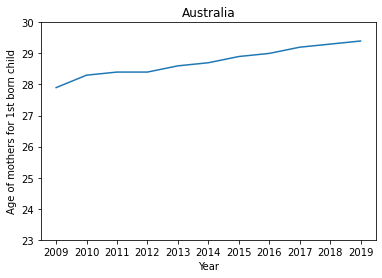

In [464]:
Australia = sns.lineplot(x=AM_Countries.columns.values,y=list(np.float_(AM_Countries.loc['Australia',].values.tolist())),data=AM_Countries.transpose())
Australia.set(xlabel="Year",ylabel="Age of mothers for 1st born child",title=AM_Countries.index[0])
#Australia.set_xlim('2000','2022')
Australia.set_ylim(23,30)

In [318]:
type(Australia)

matplotlib.axes._subplots.AxesSubplot

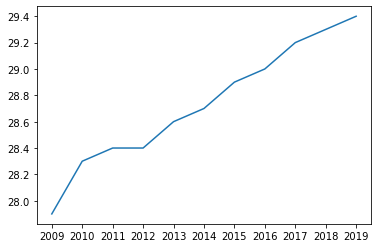

In [311]:
Australia = sns.lineplot(x=AM_Countries.columns.values,y=list(np.float_(AM_Countries.loc['Australia',].values.tolist())),data=AM_Countries.transpose())